Imports for CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import models, layers


In [2]:
#constant
Image_Size=120 # resizeing the all images
Batch_Size=60
Channels=3
Epoch1=10
Epoch2=5
Num_Classes=2

Adding Datatset

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
!unzip -q '/content/drive/MyDrive/FY_Project/currency_dataset.zip' -d '/Datasets'

Prepare Dataset

In [5]:
# load and prepare dataset
## Create a TensorFlow Dataset from the directory

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/Datasets/currency_dataset",
    shuffle=True,
    image_size=(Image_Size, Image_Size), # Reshape images to this size
    batch_size=Batch_Size                # batch size for training
)

Found 19955 files belonging to 2 classes.


In [6]:
# Print class names

class_names = dataset.class_names
print(class_names)

['Fake_', 'Original_']


Splitting the Dataset

In [7]:
def dataset_get_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert train_split + val_split + test_split == 1, "Splits must sum to 1"
    ds_size=len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=42)
    train_size=int(train_split * ds_size)
    val_size=int(val_split * ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [8]:
# apply partitioning
train_ds, val_ds, test_ds = dataset_get_partitions_tf(dataset)

# performance settings
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [9]:
# Define the directory paths to save the datasets
train_save_path = "/Datasets/DS/train_ds"
val_save_path = "/Datasets/DS/val_ds"
test_save_path = "/Datasets/DS/test_ds"

# Save the datasets
tf.data.Dataset.save(train_ds, train_save_path)
tf.data.Dataset.save(val_ds, val_save_path)
tf.data.Dataset.save(test_ds, test_save_path)

CNN Model

In [10]:
# CNN architecture
#Image_Size, Image_Size, Channels

model=models.Sequential([
    #inputs and convolution layers
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(120,120,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.5),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.5),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
    #layers.Dropout(0.5),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),

    # flating the 3d and 1d fully connected layers
    layers.Flatten(),
    layers.Dense(150, activation='relu'),
    layers.Dense(Num_Classes, activation='softmax')
])

In [11]:
# compile the model

model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [12]:
# display the model architecture

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                   

In [13]:
# callbacks

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

Train CNN model

In [14]:
# Instantiate EarlyStopping callback
# Train the model with callbacks

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=Epoch1,
    batch_size=Batch_Size,
    verbose=1,
    callbacks=[early_stopping]  # Pass the instantiated callback object
)


Epoch 1/10
266/266 [==============================] - 32s 74ms/step - loss: 0.6611 - accuracy: 0.5849 - val_loss: 0.5534 - val_accuracy: 0.6823
Epoch 2/10
266/266 [==============================] - 18s 66ms/step - loss: 0.4333 - accuracy: 0.7830 - val_loss: 0.2295 - val_accuracy: 0.9247
Epoch 3/10
266/266 [==============================] - 18s 66ms/step - loss: 0.2027 - accuracy: 0.9148 - val_loss: 0.1514 - val_accuracy: 0.9449
Epoch 4/10
266/266 [==============================] - 18s 66ms/step - loss: 0.1512 - accuracy: 0.9404 - val_loss: 0.2078 - val_accuracy: 0.9258
Epoch 5/10
266/266 [==============================] - 17s 65ms/step - loss: 0.0981 - accuracy: 0.9608 - val_loss: 0.0654 - val_accuracy: 0.9722
Epoch 6/10
266/266 [==============================] - 17s 65ms/step - loss: 0.0931 - accuracy: 0.9656 - val_loss: 0.0693 - val_accuracy: 0.9727
Epoch 7/10
266/266 [==============================] - 17s 65ms/step - loss: 0.0769 - accuracy: 0.9709 - val_loss: 0.0462 - val_accuracy:

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

34/34 [==============================] - 0s 13ms/step - loss: 0.0506 - accuracy: 0.9809
Test loss: 0.05057993158698082
Test accuracy: 0.9808823466300964


Save the Model CNN

In [16]:
model.save("/Models/model_cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Random Predictions

In [17]:
# Visualization of predictions
class_names = dataset.class_names
sample_images, sample_labels = next(iter(test_ds))

2/2 [==============================] - 1s 629ms/step


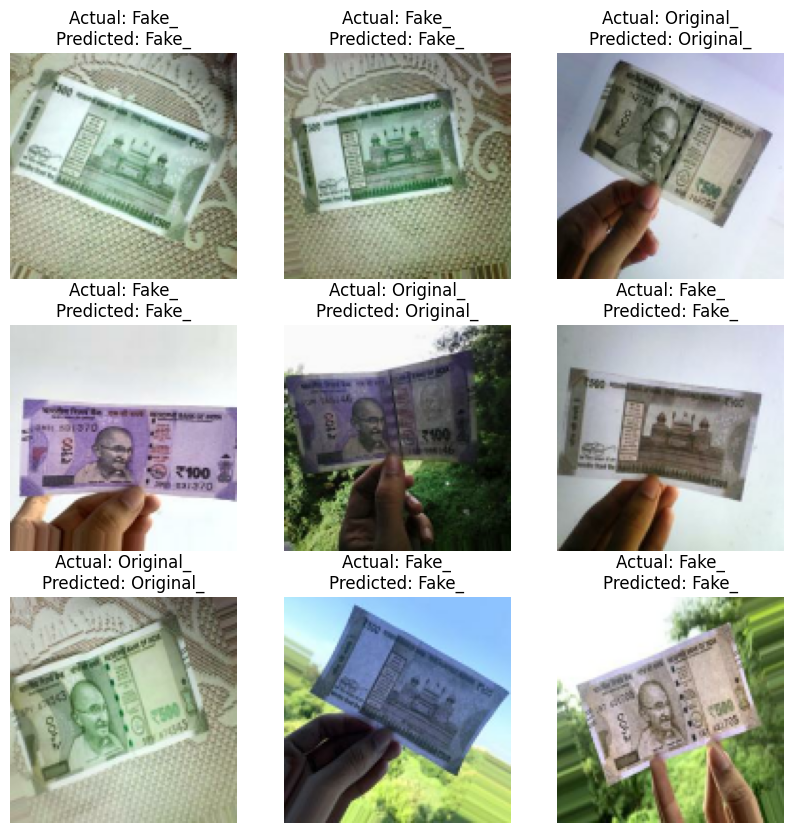

In [18]:
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].numpy().astype("uint8"))
    plt.title(f"Actual: {class_names[sample_labels[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")
plt.show()

Plotting Accuracy and Loss

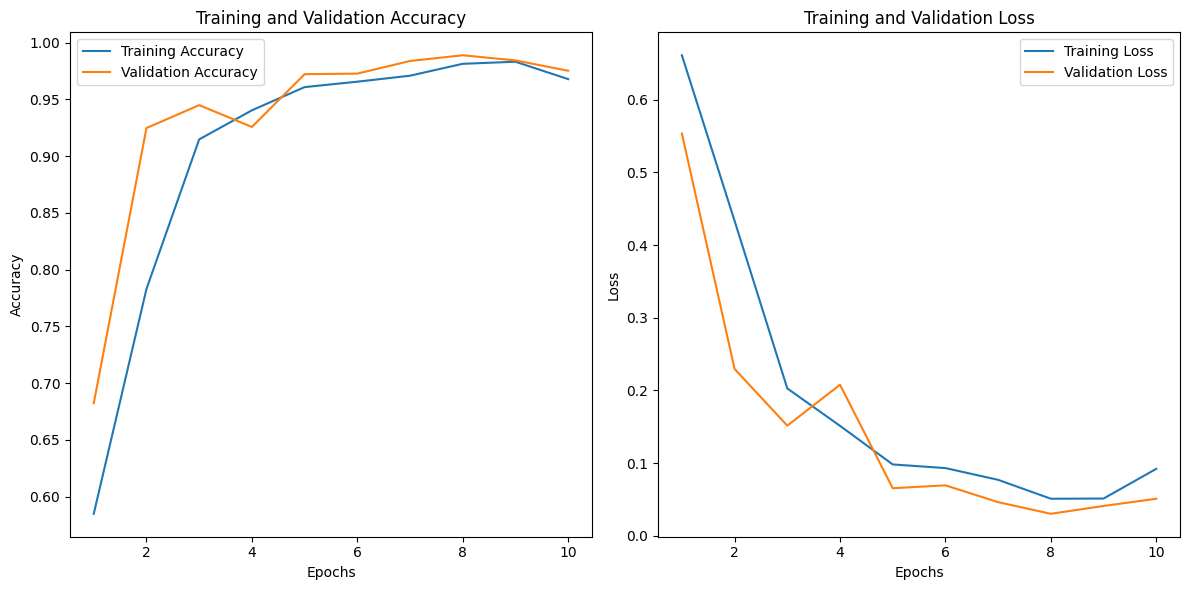

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Imports for Pretrained Models

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input, decode_predictions

In [21]:
from keras.models import Model
from keras.layers import Input,GlobalAveragePooling2D,Dense

VGG16

Load base Model

In [22]:
base_model_vgg=VGG16(include_top=False,weights='imagenet',input_shape=(120,120,3),classes=2)

58889256/58889256 [==============================] - 2s 0us/step


Add custom layers

In [23]:
base_model_vgg.trainable=False

pt=Input(shape=(120,120,3))
func=tf.cast(pt,tf.float32)
x=preprocess_input(pt)
model_vgg = base_model_vgg(x,training=False)
model_vgg = GlobalAveragePooling2D()(model_vgg)
model_vgg = Dense(128,activation='relu')(model_vgg)
model_vgg = Dense(64,activation='relu')(model_vgg)
model_vgg = Dense(2,activation='softmax')(model_vgg)


model_vgg = Model(inputs=pt,outputs=model_vgg)
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                             

In [24]:
model_vgg.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [25]:
# callbacks

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

Train the VGG16 model

In [26]:
# Instantiate EarlyStopping callback
# Train the model with callbacks

history = model_vgg.fit(
    train_ds,
    validation_data=val_ds,
    epochs=Epoch2,
    batch_size=Batch_Size,
    verbose=1,
    callbacks=[early_stopping]  # Pass the instantiated callback object
)

Epoch 1/5
266/266 [==============================] - 31s 96ms/step - loss: 0.2984 - accuracy: 0.9023 - val_loss: 0.0885 - val_accuracy: 0.9631
Epoch 2/5
266/266 [==============================] - 22s 84ms/step - loss: 0.0563 - accuracy: 0.9788 - val_loss: 0.0386 - val_accuracy: 0.9869
Epoch 3/5
266/266 [==============================] - 23s 85ms/step - loss: 0.0326 - accuracy: 0.9888 - val_loss: 0.0271 - val_accuracy: 0.9909
Epoch 4/5
266/266 [==============================] - 22s 84ms/step - loss: 0.0253 - accuracy: 0.9904 - val_loss: 0.0346 - val_accuracy: 0.9894
Epoch 5/5
266/266 [==============================] - 22s 83ms/step - loss: 0.0149 - accuracy: 0.9941 - val_loss: 0.0193 - val_accuracy: 0.9909


In [27]:
# Evaluate the model on the test set
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(test_ds)
print(f"Test loss: {test_loss_vgg}")
print(f"Test accuracy: {test_accuracy_vgg}")

34/34 [==============================] - 3s 74ms/step - loss: 0.0098 - accuracy: 0.9971
Test loss: 0.009774773381650448
Test accuracy: 0.9970588088035583


Save VGG16 Model

In [28]:
model_vgg.save("/Models/model_vgg16.h5")

Random Predictions

In [29]:
# Visualization of predictions
class_names = dataset.class_names
sample_images, sample_labels = next(iter(test_ds))

Plot Accuracy and Loss

2/2 [==============================] - 5s 2s/step


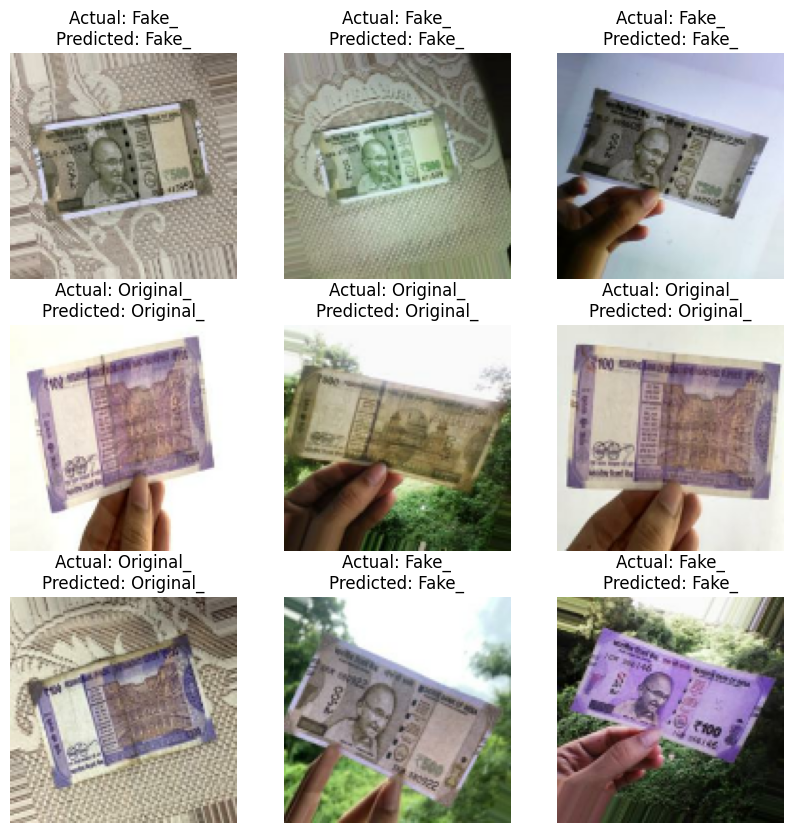

In [30]:
import numpy as np
predictions_tf = model_vgg.predict(sample_images)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].numpy().astype("uint8"))
    plt.title(f"Actual: {class_names[sample_labels[i]]}\nPredicted: {class_names[np.argmax(predictions_tf[i])]}")
    plt.axis("off")
plt.show()

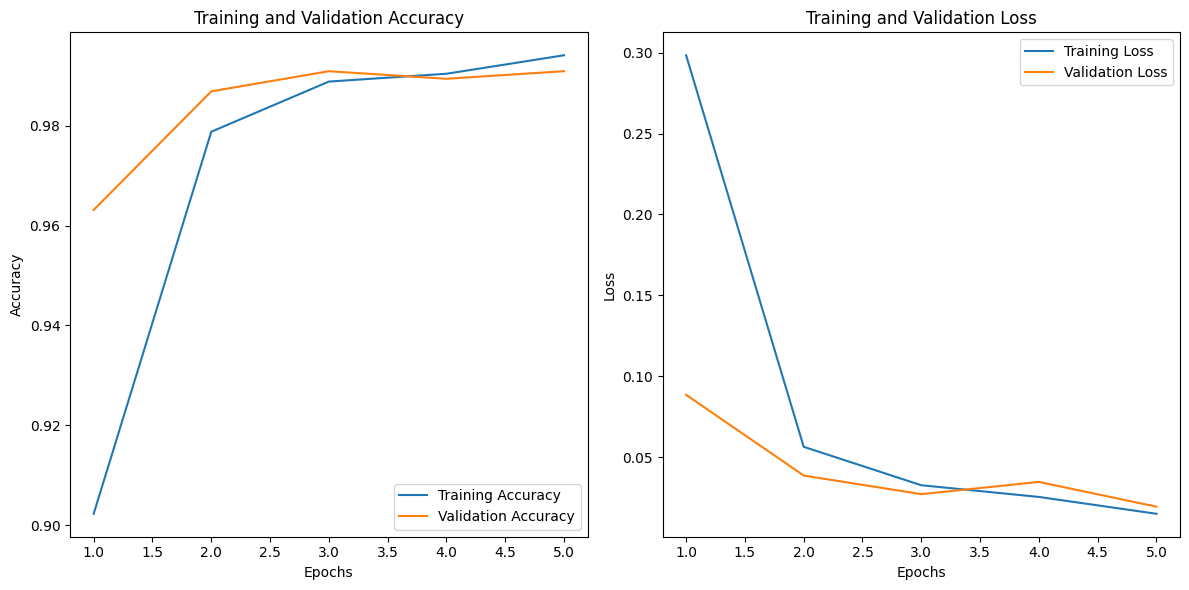

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

ResNet50

Load Base Model

In [32]:
base_model_res=ResNet50(include_top=False,weights='imagenet',input_shape=(120,120,3),classes=2)

94765736/94765736 [==============================] - 3s 0us/step


Add Custom Layers

In [33]:
base_model_res.trainable=False

pt=Input(shape=(120,120,3))
func=tf.cast(pt,tf.float32)
x=preprocess_input(pt)
model_res = base_model_res(x,training=False)
model_res = GlobalAveragePooling2D()(model_res)
model_res = Dense(128,activation='relu')(model_res)
model_res = Dense(64,activation='relu')(model_res)
model_res = Dense(2,activation='softmax')(model_res)


model_res = Model(inputs=pt,outputs=model_res)
model_res.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 128)               262272    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                           

In [34]:
model_res.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [35]:
# callbacks

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

Train ResNet50 Model

In [36]:
# Instantiate EarlyStopping callback
# Train the model with callbacks

history = model_res.fit(
    train_ds,
    validation_data=val_ds,
    epochs=Epoch2,
    batch_size=Batch_Size,
    verbose=1,
    callbacks=[early_stopping]  # Pass the instantiated callback object
)

Epoch 1/5
266/266 [==============================] - 26s 78ms/step - loss: 0.2327 - accuracy: 0.8955 - val_loss: 0.1094 - val_accuracy: 0.9566
Epoch 2/5
266/266 [==============================] - 18s 66ms/step - loss: 0.0672 - accuracy: 0.9753 - val_loss: 0.0460 - val_accuracy: 0.9838
Epoch 3/5
266/266 [==============================] - 18s 66ms/step - loss: 0.0360 - accuracy: 0.9873 - val_loss: 0.0384 - val_accuracy: 0.9869
Epoch 4/5
266/266 [==============================] - 17s 65ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0176 - val_accuracy: 0.9949
Epoch 5/5
266/266 [==============================] - 17s 65ms/step - loss: 0.0277 - accuracy: 0.9898 - val_loss: 0.0274 - val_accuracy: 0.9914


In [37]:
# Evaluate the model on the test set
test_loss_res, test_accuracy_res = model_res.evaluate(test_ds)
print(f"Test loss: {test_loss_res}")
print(f"Test accuracy: {test_accuracy_res}")

34/34 [==============================] - 2s 59ms/step - loss: 0.0235 - accuracy: 0.9931
Test loss: 0.023457596078515053
Test accuracy: 0.9931372404098511


Save the Model

In [38]:
model_res.save("/Models/model_resnet50.h5")

Random Predictions

In [39]:
# Visualization of predictions
class_names = dataset.class_names
sample_images, sample_labels = next(iter(test_ds))

2/2 [==============================] - 4s 984ms/step


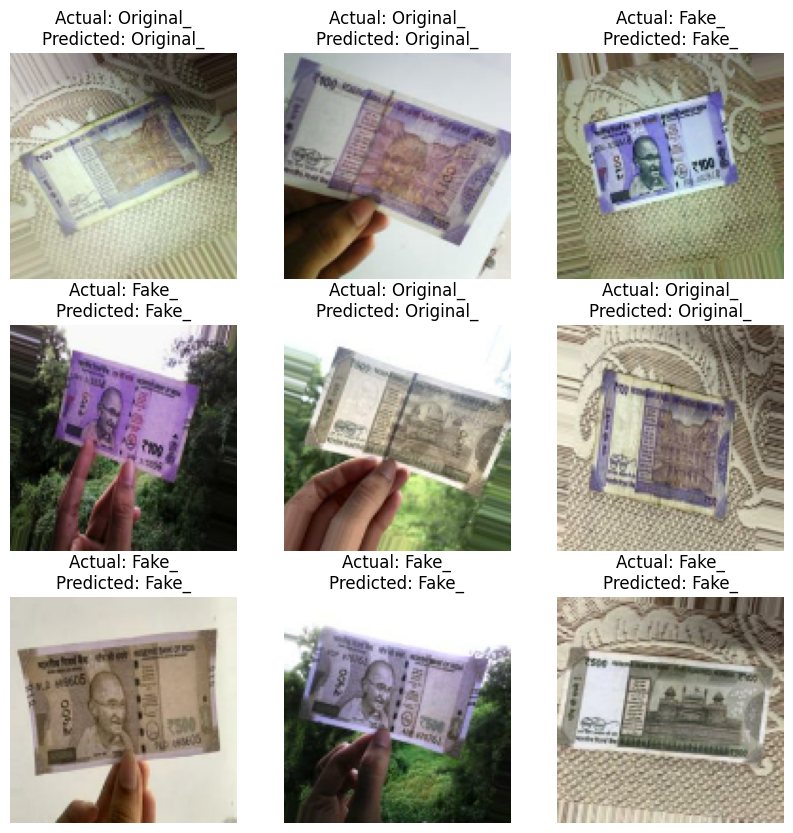

In [40]:
import numpy as np
predictions_res = model_res.predict(sample_images)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].numpy().astype("uint8"))
    plt.title(f"Actual: {class_names[sample_labels[i]]}\nPredicted: {class_names[np.argmax(predictions_res[i])]}")
    plt.axis("off")
plt.show()

Plot Accuracy and Loss

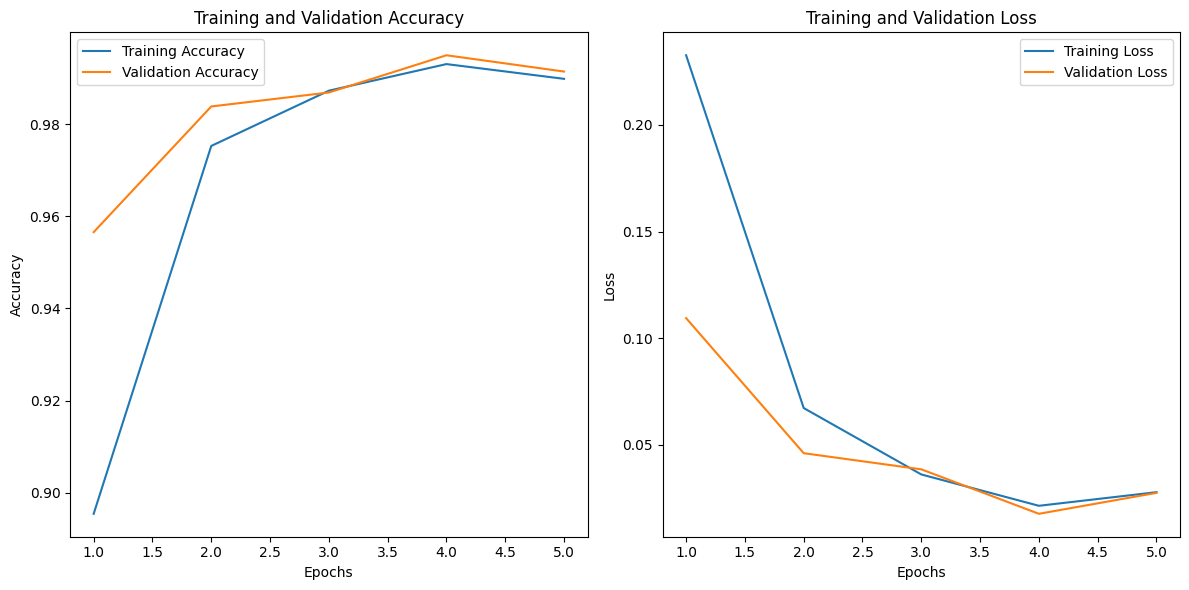

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()